In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
stations = base.classes.station
measurements = base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurements.date).order_by(measurements.date.desc()).first()

('2017-08-23',)

In [10]:
# Calculate the date one year from the last date in data set.

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores

scores = session.query(measurements.date, measurements.prcp).filter(measurements.date >= "2016-08-23").filter(measurements.date <= "2017-08-23").all()

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column

precip_df = pd.DataFrame(scores, columns=['date','prcp']).set_index('date')

# Sort the dataframe by date

precip_df.sort_values(by='date',ascending= True, inplace=True) 

<AxesSubplot:xlabel='date'>

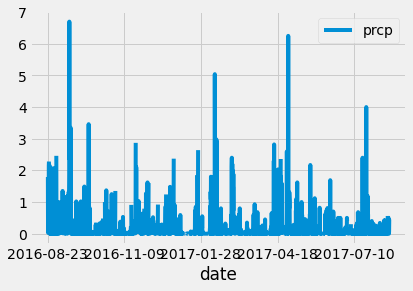

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data

precip_df.plot()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(stations.station)).all()
total_stations[0][0]

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
actives = session.query(measurements.station, func.count(measurements.station)).group_by(measurements.station).order_by(func.count(measurements.station).desc()).all()
actives

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
most_active =actives[0] 
most_active

('USC00519281', 2772)

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
actives_data = session.query(measurements.station,func.min(measurements.tobs), func.max(measurements.tobs),func.avg(measurements.tobs)).filter(measurements.station == most_active[0]).all()
actives_data

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

<Figure size 432x288 with 0 Axes>

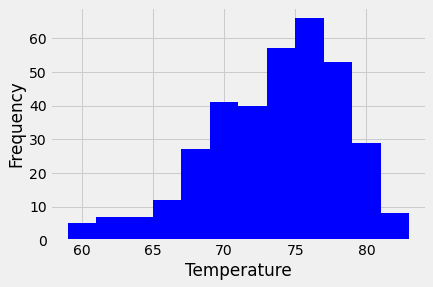

<Figure size 432x288 with 0 Axes>

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs= session.query(measurements.tobs).\
                        filter(measurements.date >= "2016-08-23").\
                       filter(measurements.station == "USC00519281").all()

active_tobs= [temp[0] for temp in tobs]

plt.hist(active_tobs, bins=12, color="blue")
labels = ['tobs']
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.figure()

# Close session

In [19]:
# Close Session
session.close()